## Vasicek model:
(inspired by https://www.r-bloggers.com/fun-with-the-vasicek-interest-rate-model/)    

In [93]:
import numpy as np
import numpy.random as rand
import math
import matplotlib.pyplot as plt
%matplotlib inline 


## define model parameters
r0 = 0.03

## simulate short rate paths
n = 10    # MC simulation trials
T = 10    # total time
m = 200   # subintervals
dt = T*1.0/m  # difference in time each subinterval


def vasicek_dr(r,i,j):
    theta = 0.10
    k = 0.3
    beta = 0.03
    return k *(theta - r[i-1,j])*dt + beta*r[i,j]


def MC_rate(model):
    r = rand.normal(size=(m+1,n))  # matrix to hold short rate paths
    r[0]=r0

    for j in range(n):
        for i in range(1, m+1):
            dr = model(r,i,j)
            r[i,j] = r[i-1,j] + dr
        plt.plot(range(m+1), r[:,j])
    plt.show()
    
    

    

## Cox–Ingersoll–Ross model

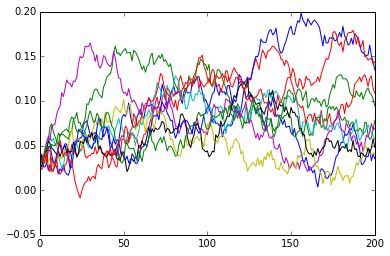

In [94]:
def cir_dr(r,i,j):
    theta = 0.10
    k = 0.3
    beta = 0.03
    return k *(theta - r[i-1,j])*dt + beta*math.sqrt(dt)*r[i,j]

MC_rate(cir_dr)

## Hull-White model:

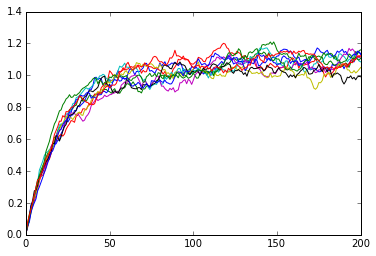

In [95]:
r0 = 0.01
def td_theta(t):
    #return r0
    return math.exp(r0*t)

def HW_model(r,t,j):
    a = 0.1
    sigma = 0.015
    return (td_theta(t*dt) - r[t-1,j])*dt + sigma*r[t,j]

MC_rate(HW_model)